# Process all data with 3C 279 or Geminga

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve
import warnings
warnings.filterwarnings('error')

### Geminga: load data

In [5]:
%%time 
self = main.Main('Geminga',  interval=5, mjd_range=None,        
                 weight_file='../data/geminga_weights.pkl')

Selected position: (l,b)=(195.134,4.266), radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
CPU times: user 1min 10s, sys: 11.5 s, total: 1min 22s
Wall time: 1min 27s


#### Create a BinnedWeights object with all data, check it

Binning: 730 intervals of 5 days from 54683.00 to 58333.00


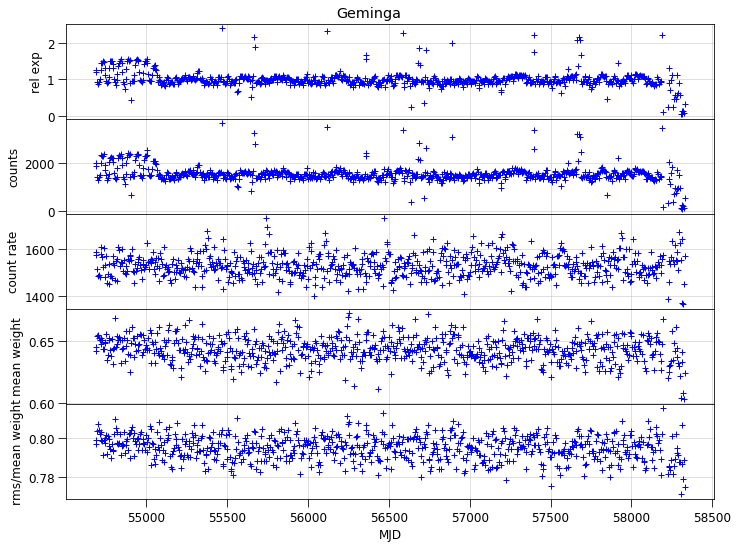

In [6]:
bw=self.binned_weights()
bw.test_plots();

#### Now pass that to the LightCurve class, which does fitting

In [7]:
lc = light_curve.LightCurve(bw); 
%time lc.fit(fix_beta=False)

Fits: 724 good, 6 failed 
CPU times: user 35.7 s, sys: 63 ms, total: 35.7 s
Wall time: 36.8 s


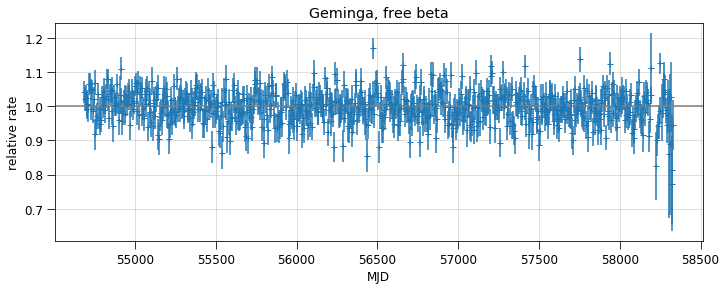

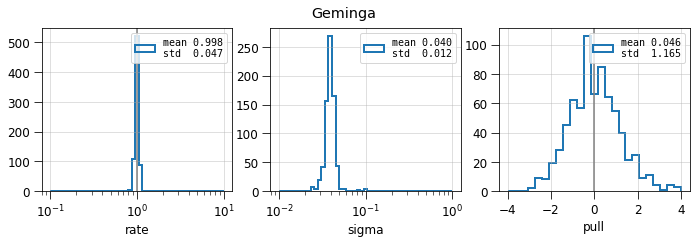

In [8]:
lc.rate_plot(title='Geminga, free beta')
lc.fit_hists()

### fit with fixed beta

In [9]:
%time lc.fit(fix_beta=True)

Fits: 720 good, 10 failed 
CPU times: user 9.29 s, sys: 15 ms, total: 9.31 s
Wall time: 9.64 s


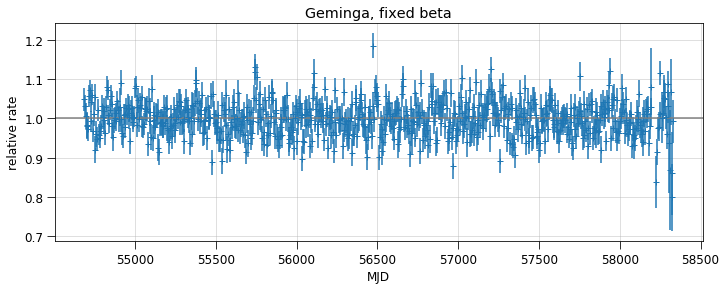

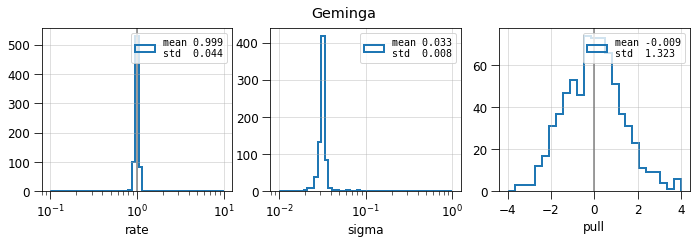

In [10]:
lc.rate_plot(title = 'Geminga, fixed beta')
lc.fit_hists()